In [2]:
import os 
from  secret_key import openai_key
from langchain.llms import OpenAI
os.environ['OPENAI_API_KEY'] = openai_key

In [3]:
## temperature - How creative you want your answer need to be
llm = OpenAI(temperature=0.6)
name = llm('I want to open a restraunt for Indian Food. Suggest a fency name for this .')
print(name)



Royal Indian Cuisine


##### Prompt Template

In [4]:
## You can ask same question for Italian or Mexican Food. We will not write complete question again and again .Instead we will use prompt
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(input_variables=['cuisine'],
               template = 'I want to open a restraunt for {cuisine} food.Sugget a fency name for this')

prompt_template_name.format(cuisine='mexican')

'I want to open a restraunt for mexican food.Sugget a fency name for this'

##### Chains

To connect prompt template with LLM model we will have to use chains 

In [5]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm,prompt=prompt_template_name)
chain.run('American')

'?\n\nAmerican Fusion Cuisine'

##### Simple Sequential Chain 

Till now we were giving input as cuisine and LLM was suggesting restraunt name . But Now for that .You also need to generate Food items . 

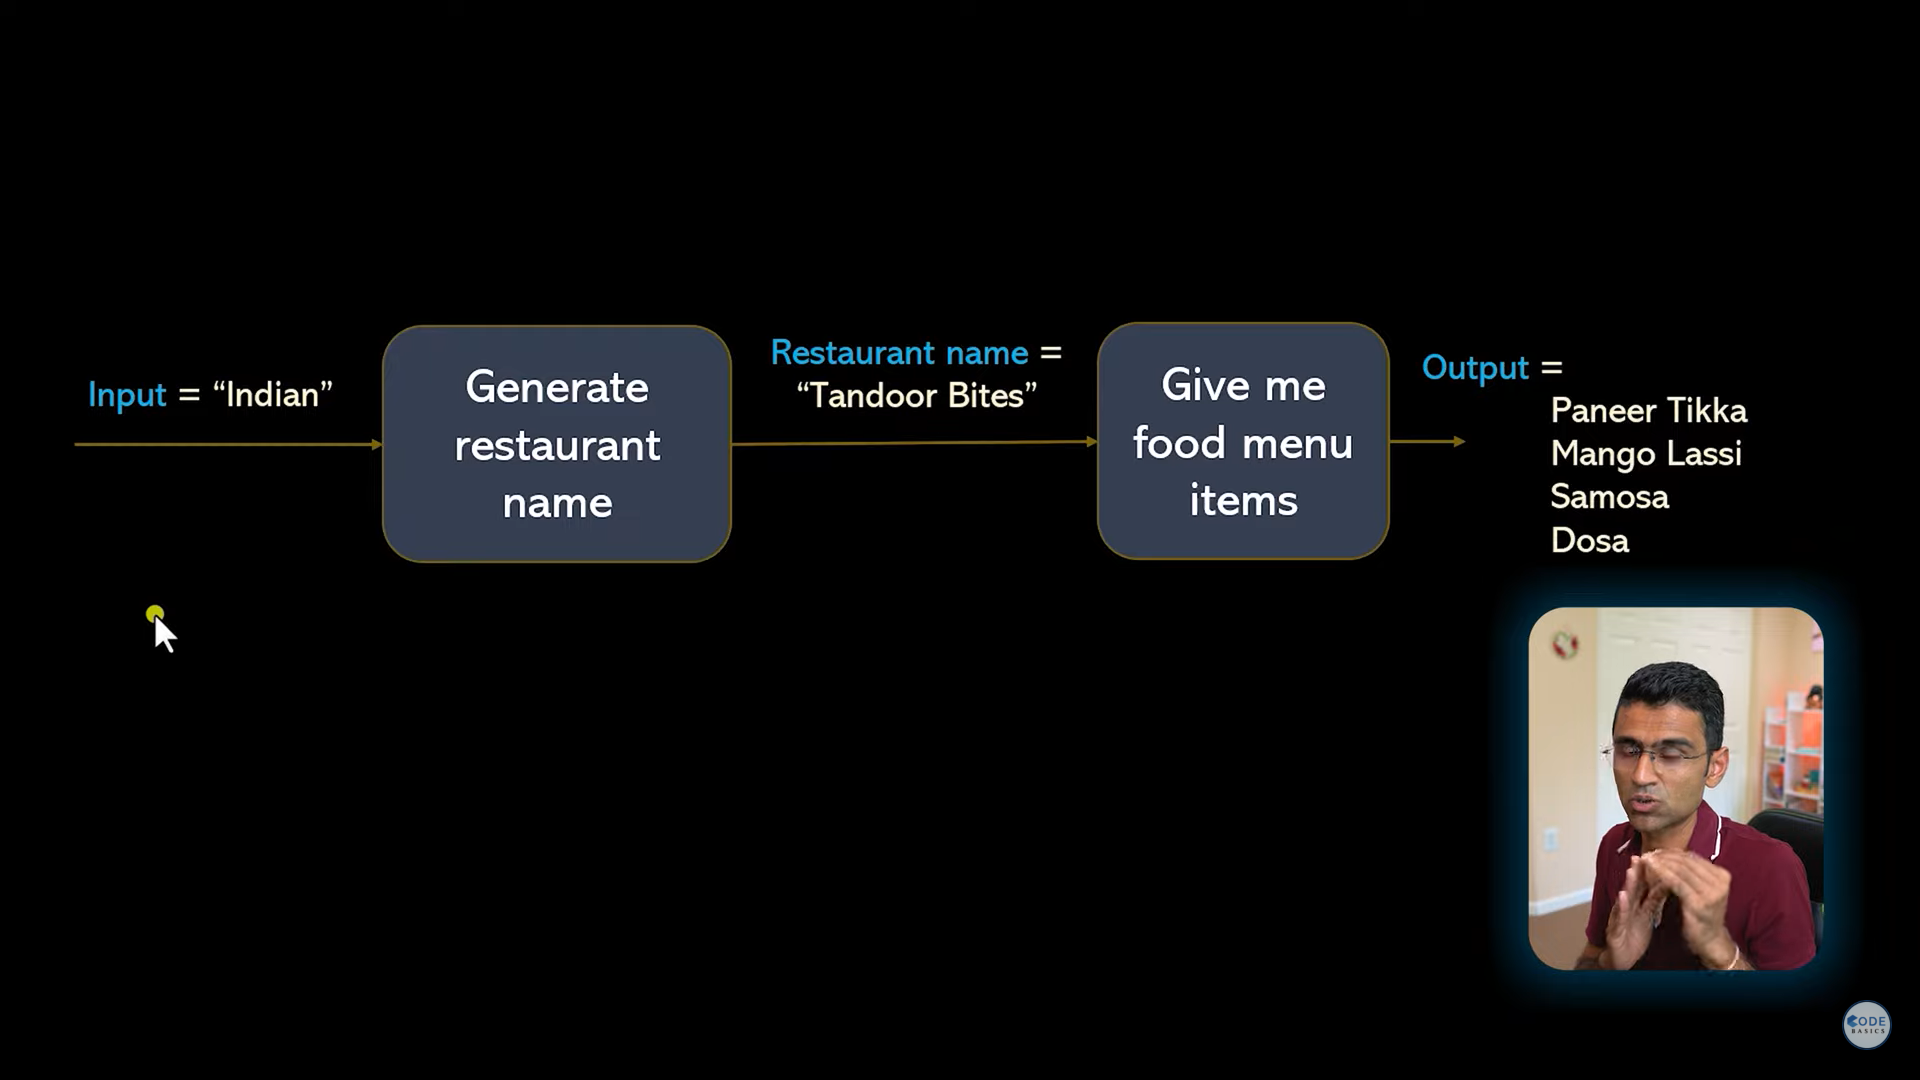

In [6]:
llm = OpenAI(temperature=0.6)
prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template = 'I want to open a restraunt for {cuisine} food.Suggest a fency name for this.Only one name please'
)
name_chain = LLMChain(llm=llm,prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables=['restraunt_name'],
    template='Suggest some menu items for {restraunt_name}.Return it as a comma seperated list'
)

food_items_chain = LLMChain(llm=llm,prompt=prompt_template_items)

## SimpleSequentialChain will give o/p  for only last chain. You wont get output for each chain

from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains=[name_chain,food_items_chain])
response = chain.run('Indian')
print(response)




Samosa, Paneer Tikka Masala, Chana Masala, Dal Makhani, Aloo Gobi, Naan, Tandoori Chicken, Biryani, Raita, Gulab Jamun.


##### SequentialChain
To get output for each chain . We will have to use SequentialChain

In [7]:
llm = OpenAI(temperature=0.6)
prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template = 'I want to open a restraunt for {cuisine} food.Suggest a fency name for this.Only one name please'
)
name_chain = LLMChain(llm=llm,prompt=prompt_template_name,output_key='restraunt_name')

prompt_template_items = PromptTemplate(
    input_variables=['restraunt_name'],
    template='Suggest some menu items for {restraunt_name}.Return it as a comma seperated list'
)

food_items_chain = LLMChain(llm=llm,prompt=prompt_template_items,output_key='menu_items')

## SimpleSequentialChain will give o/p  for only last chain. You wont get output for each chain

from langchain.chains import SequentialChain
chain = SequentialChain(chains=[name_chain,food_items_chain],
                        input_variables=['cuisine'],
                        output_variables=['restraunt_name','menu_items'])

## You might have multiple input variables. Therefore we will have to use dictionary 
response = chain({'cuisine':'Mexican'})
print(response)


{'cuisine': 'Mexican', 'restraunt_name': '\n\nTaco Fiesta', 'menu_items': '\n\nTaco Salad, Fish Tacos, Chicken Tacos, Chorizo Tacos, Carne Asada Tacos, Beef Barbacoa Tacos, Carnitas Tacos, Vegetarian Tacos, Quesadillas, Nachos, Burritos, Guacamole, Pico de Gallo, Refried Beans.'}
